In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Load the crime dataset
crime = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_crime.csv"))

# Load the victim dataset
victim = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_victim.csv"))

# Load the Location dataset
location = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_location.csv"))

# Load the crime_code dataset
area = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_area.csv"))

# Load the crime_code dataset
crime_code = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_crime_code.csv"))

# Load the premise dataset
premise = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_premise.csv"))

# Load the status dataset
status = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_status.csv"))

# Load the weapon dataset
weapon = pd.read_csv(os.path.expanduser("~/airflow/DE_Project/Data/normalized_weapon.csv"))

In [6]:
# Merging the data step by step

# Merge crime with victim data
df = pd.merge(crime, victim, on='victim_id', how='left')

# Merge with location data
df = pd.merge(df, location, on='location_id', how='left')

# Merge with area data
df = pd.merge(df, area, on='area_id', how='left')

# Merge with crime_code data
df = pd.merge(df, crime_code, on='crime_code', how='left')

# Merge with premise data
df = pd.merge(df, premise, on='premise_code', how='left')

# Merge with status data
df = pd.merge(df, status, on='status', how='left')

# Merge with weapon data
df = pd.merge(df, weapon, on='weapon_code', how='left')

# Check the first few rows of the merged dataframe
df.shape

(982042, 25)

In [8]:
# Convert time_occurred to datetime and extract the hour
df['time_occurred'] = pd.to_datetime(df['time_occurred'], errors='coerce')
df['hour'] = df['time_occurred'].dt.hour


/var/folders/12/jkn202rj4hnc4mxwzthf306c0000gn/T/ipykernel_22263/494245415.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_occurred'] = pd.to_datetime(df['time_occurred'], errors='coerce')


In [10]:
import re
crime_map = {
    r'VEHICLE - STOLEN': 'Vehicle Theft',
    r'BURGLARY FROM VEHICLE': 'Burglary from Vehicle',
    r'BIKE - STOLEN': 'Bike Theft',
    r'SHOPLIFTING-GRAND THEFT \(\$950\.01 & OVER\)': 'Shoplifting - Grand Theft',
    r'THEFT OF IDENTITY': 'Identity Theft',
    r'BATTERY - SIMPLE ASSAULT': 'Simple Assault',
    r'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Sodomy/Sexual Contact',
    r'CRM AGNST CHLD \(13 OR UNDER\) \(14-15 & SUSP 10 YRS OLDER\)': 'Crime Against Child (Under 15)',
    r'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Aggravated Assault with Deadly Weapon',
    r'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Lewd Letters/Calls',
    r'THEFT-GRAND \(\$950\.01 & OVER\)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Grand Theft (Excluding Guns)',
    r'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Criminal Threats (No Weapon)',
    r'EMBEZZLEMENT, GRAND THEFT \(\$950\.01 & OVER\)': 'Grand Theft Embezzlement',
    r'THEFT FROM MOTOR VEHICLE - PETTY \(\$950 & UNDER\)': 'Petty Theft from Motor Vehicle',
    r'CHILD ANNOYING \(17YRS & UNDER\)': 'Child Annoying (Under 17)',
    r'THEFT PLAIN - PETTY \(\$950 & UNDER\)': 'Petty Theft',
    r'INTIMATE PARTNER - SIMPLE ASSAULT': 'Intimate Partner Simple Assault',
    r'LEWD CONDUCT': 'Lewd Conduct',
    r'THEFT PLAIN - ATTEMPT': 'Attempted Theft',
    r'BURGLARY': 'Burglary',
    r'THEFT FROM MOTOR VEHICLE - GRAND \(\$950\.01 AND OVER\)': 'Grand Theft from Motor Vehicle',
    r'ROBBERY': 'Robbery',
    r'BUNCO, GRAND THEFT': 'Grand Theft (Bunco)',
    r'BATTERY WITH SEXUAL CONTACT': 'Battery with Sexual Contact',
    r'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Intimate Partner Aggravated Assault',
    r'ORAL COPULATION': 'Oral Copulation',
    r'UNAUTHORIZED COMPUTER ACCESS': 'Unauthorized Computer Access',
    r'SEX,UNLAWFUL\(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ\)': 'Unlawful Sex (Mutual Consent)',
    r'VIOLATION OF RESTRAINING ORDER': 'Violation of Restraining Order',
    r'SHOPLIFTING - PETTY THEFT \(\$950 & UNDER\)': 'Petty Shoplifting',
    r'VANDALISM - FELONY \(\$400 & OVER, ALL CHURCH VANDALISMS\)': 'Felony Vandalism (Over $400)',
    r'OTHER MISCELLANEOUS CRIME': 'Miscellaneous Crime',
    r'BRANDISH WEAPON': 'Brandishing a Weapon',
    r'DOCUMENT FORGERY / STOLEN FELONY': 'Document Forgery/Felony',
    r'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Sex Offender Non-Compliance',
    r'RAPE, FORCIBLE': 'Forcible Rape',
    r'VANDALISM - MISDEAMEANOR \(\$399 OR UNDER\)': 'Misdemeanor Vandalism (Under $400)',
    r'CHILD ABUSE \(PHYSICAL\) - SIMPLE ASSAULT': 'Physical Child Abuse (Simple Assault)',
    r'CREDIT CARDS, FRAUD USE \(\$950\.01 & OVER\)': 'Credit Card Fraud (Over $950)',
    r'THREATENING PHONE CALLS/LETTERS': 'Threatening Calls/Letters',
    r'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Sexual Penetration with Foreign Object',
    r'EXTORTION': 'Extortion',
    r'OTHER ASSAULT': 'Other Assaults',
    r'PICKPOCKET': 'Pickpocketing',
    r'ARSON': 'Arson',
    r'DISTURBING THE PEACE': 'Disturbing the Peace',
    r'BUNCO, ATTEMPT': 'Attempted Bunco',
    r'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'Human Trafficking (Involuntary Servitude)',
    r'PIMPING': 'Pimping',
    r'PEEPING TOM': 'Peeping Tom',
    r'VIOLATION OF COURT ORDER': 'Violation of Court Order',
    r'CONTEMPT OF COURT': 'Contempt of Court',
    r'FALSE POLICE REPORT': "False Police Report",
    r'CONTRIBUTING': "Contributing to Delinquency",
    r'FALSE IMPRISONMENT': "False Imprisonment",
    
   # Attempted crimes
   r'CHILD ABUSE \(PHYSICAL\) - AGGRAVATED ASSAULT': "Aggravated Child Abuse",
   r'ATTEMPTED ROBBERY': "Attempted Robbery",
   # Fraud
   r'CREDIT CARDS, FRAUD USE \(\$950 & UNDER\)': "Credit Card Fraud (Under $950)",
   # Other crimes
   r'CHILD STEALING':'Child Stealing', 
   # Lewd acts
   r'LEWD/LASCIVIOUS ACTS WITH CHILD':'Lewd Acts with Child', 
   # Embezzlement
   r'EMBEZZLEMENT, PETTY THEFT \(\$950 & UNDER\)':'Petty Embezzlement', 
   # Exposure
   r'INDECENT EXPOSURE':'Indecent Exposure', 
   # Neglect
   r'CHILD NEGLECT \(SEE 300 W.I.C.\)':'Child Neglect', 
   # Stalking
   r'STALKING':'Stalking', 
   # Dishonesty
   r'DISHONEST EMPLOYEE - GRAND THEFT':'Dishonest Employee Grand Theft', 
   # Trespassing
   r'TRESPASSING':'Trespassing', 
   # Attempted burglary
   r'BURGLARY, ATTEMPTED':'Attempted Burglary', 
   # Attempted rape
   r'RAPE, ATTEMPTED':'Attempted Rape', 
   # Firearms discharge
   r'DISCHARGE FIREARMS/SHOTS FIRED':'Discharge Firearms', 
   # Commercial sex trafficking
   r'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS':'Human Trafficking Commercial Sex', 
   # Vehicle theft attempts
   r'VEHICLE - ATTEMPT STOLEN':'Attempted Vehicle Theft', 
   # Pandering
   r'PANDERING':'Pandering', 
   # Firearms restraining order
   r'FIREARMS RESTRAINING ORDER \(FIREARMS RO\)':'Firearms Restraining Order', 
   # Resisting arrest
   r'RESISTING ARREST':'Resisting Arrest', 
   
# Attempted crimes from vehicles
r'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS':'Human Trafficking Commercial Sex Acts'
}

   # Function to standardize crime descriptions
def crime_description(description):
    for pattern, label in crime_map.items():
        if re.search(pattern, description, re.IGNORECASE):
            return label
    return "Other"  # Default label if no match found

# Apply the standardization function to create a new column
df['crime_description'] = df['crime_code_description'].apply(crime_description)


## Question 1

### What are the most common types of crimes reported in the dataset, and how do their frequencies compare across different geographical areas?

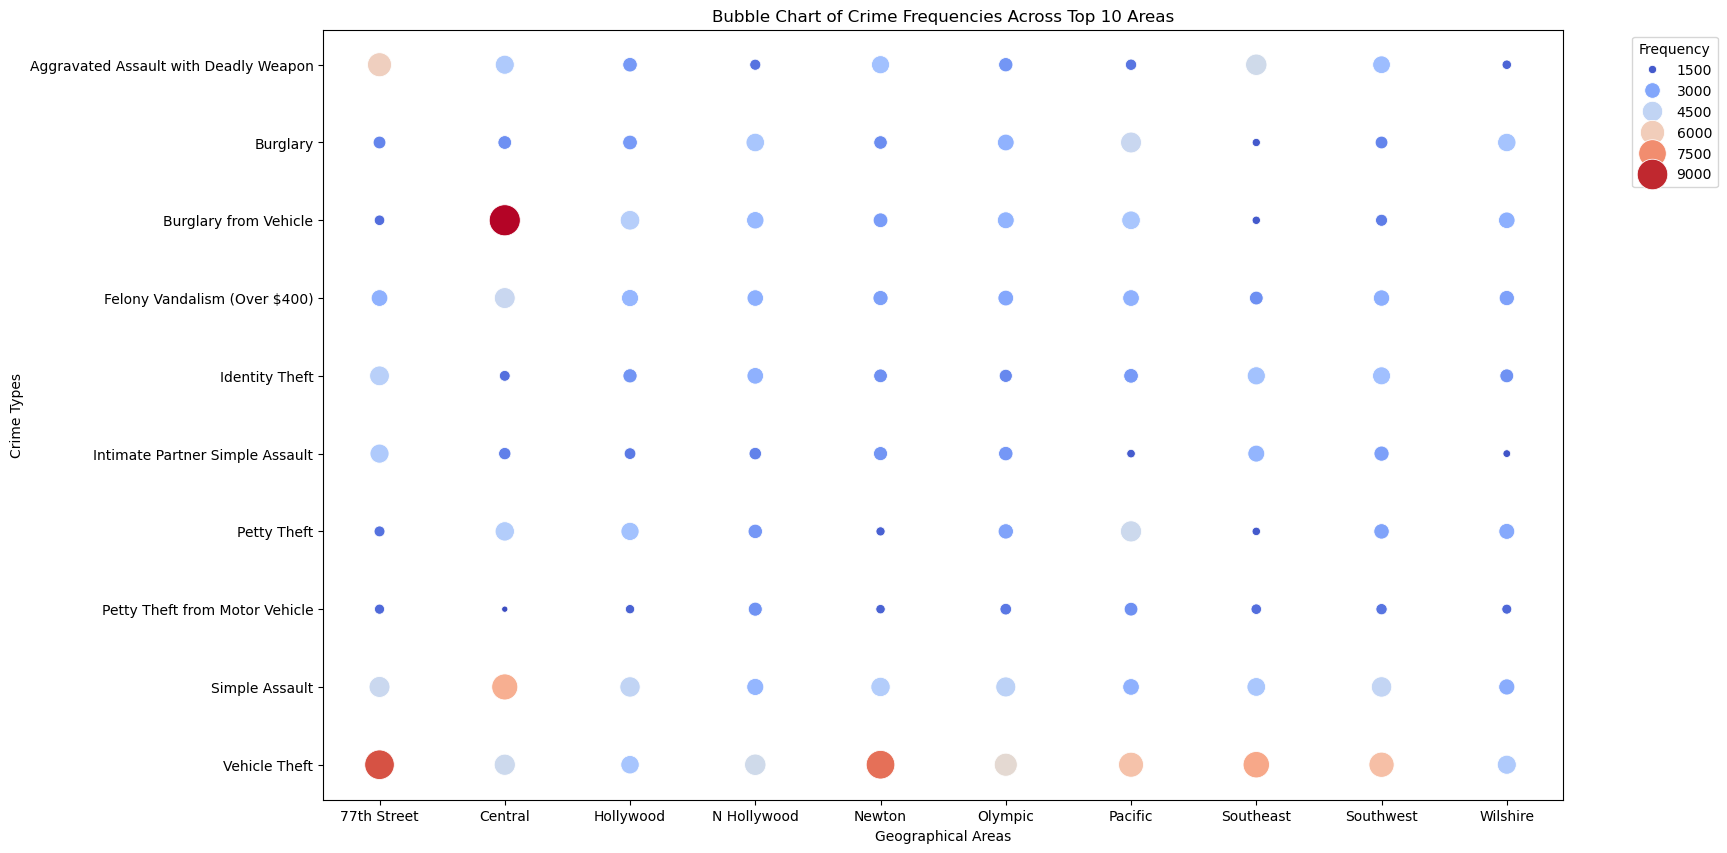

In [41]:
# Filter for top 10 crimes and top 10 areas
top_crimes = df['crime_description'].value_counts().head(10).index
top_areas = df['area_name'].value_counts().head(10).index

filtered_data = crime_area_freq[
    (crime_area_freq['crime_description'].isin(top_crimes)) & 
    (crime_area_freq['area_name'].isin(top_areas))
]

# Visualization: Bubble chart
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=filtered_data,
    x='area_name',
    y='crime_description',
    size='count',
    sizes=(20, 500),
    hue='count',
    palette='coolwarm'
)
plt.title("Bubble Chart of Crime Frequencies Across Top 10 Areas")
plt.xlabel("Geographical Areas")
plt.ylabel("Crime Types")
plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Question 2

### Is there a correlation between the time of day (TIME OCC) and specific crime types (Crm Cd Desc)?

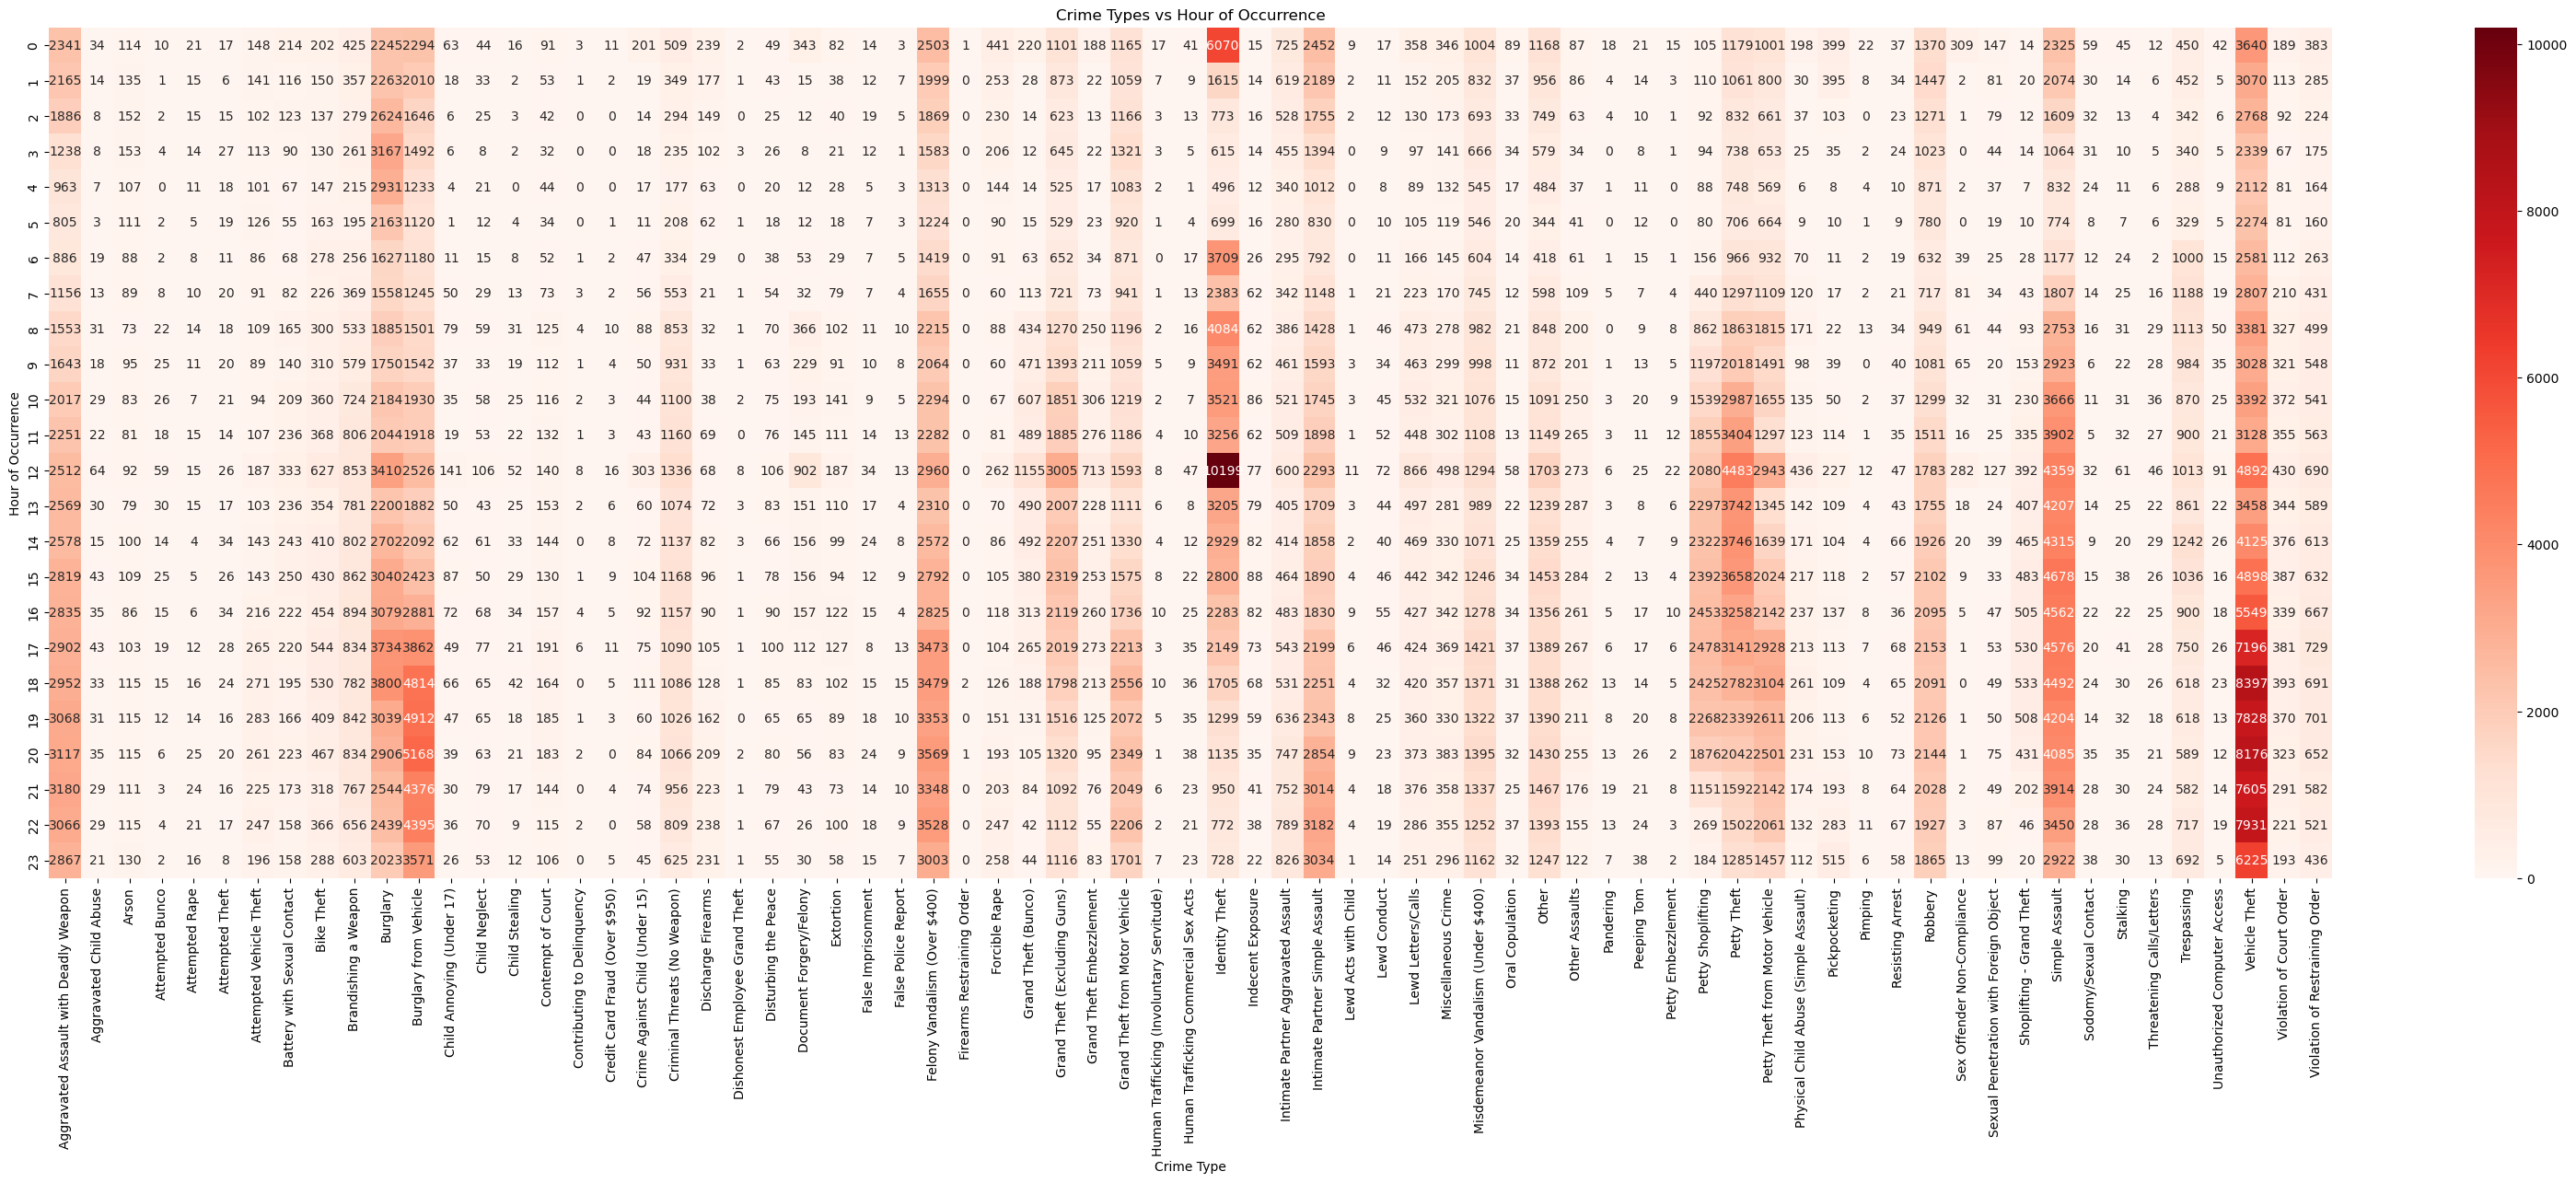

In [18]:
# Create a pivot table to aggregate counts
crime_heatmap = df.pivot_table(index='hour', columns='crime_description', aggfunc='size', fill_value=0)

plt.figure(figsize=(40,12))
sns.heatmap(crime_heatmap, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title("Crime Types vs Hour of Occurrence")
plt.xlabel("Crime Type")
plt.ylabel("Hour of Occurrence")
plt.show()


## Question 3

### How does the age and gender of Criminals (Vict Age, Vict Sex) vary across different crime categories?

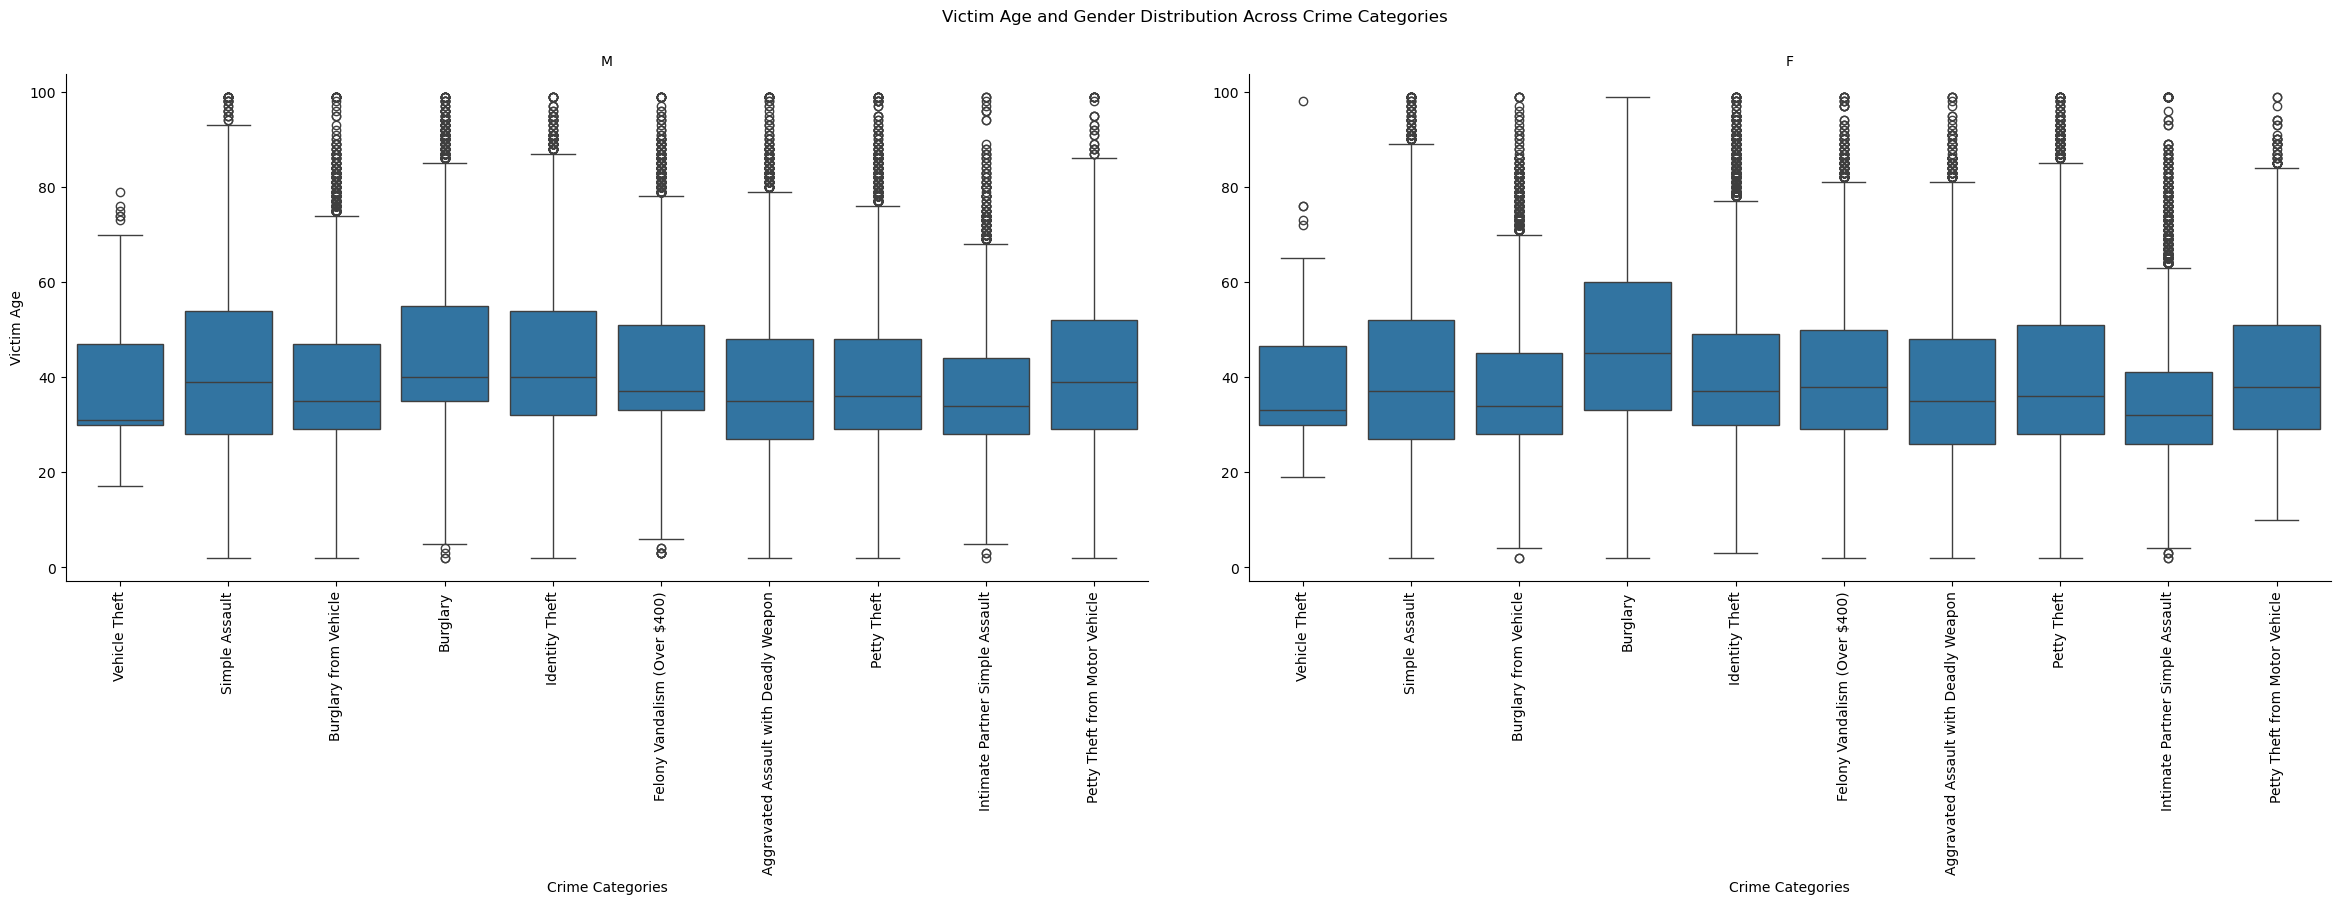

In [24]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='victim_sex', height=6, aspect=2, sharey=False)
g.map(sns.boxplot, 'crime_description', 'victim_age', order=top_crimes.index)
g.set_titles("{col_name}")
g.set_axis_labels("Crime Categories", "Victim Age")
g.set_xticklabels(rotation=90)
g.fig.suptitle("Victim Age and Gender Distribution Across Crime Categories", y=1.05)

plt.show()

## Question 4

### What trends can be observed in the use of weapons (Weapon Used Cd, Weapon Desc) for various crime types over the given time period?

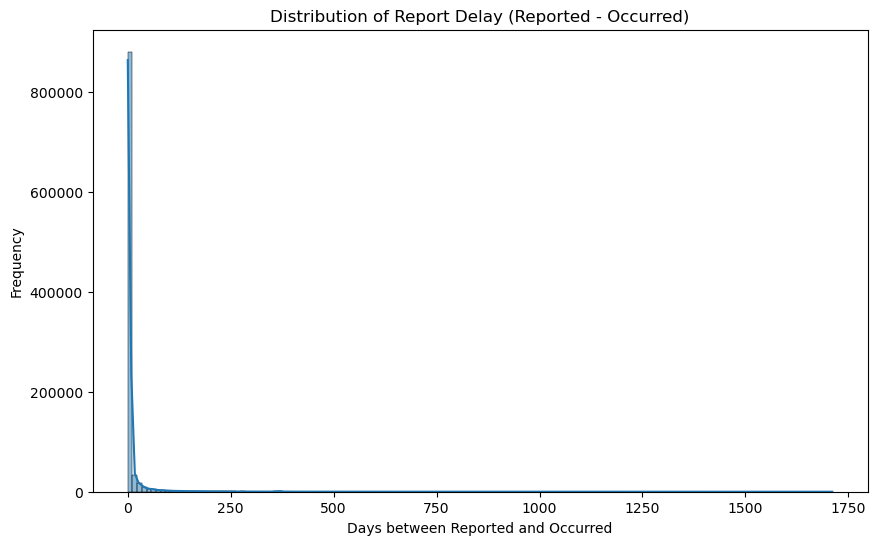

count    982042.000000
mean         11.864210
std          66.854259
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1711.000000
Name: report_delay, dtype: float64


In [28]:
# Convert date columns to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')
df['date_occurred'] = pd.to_datetime(df['date_occurred'], errors='coerce')

# Calculate the difference in days between date_reported and date_occurred
df['report_delay'] = (df['date_reported'] - df['date_occurred']).dt.days

# Plot the distribution of report delays
plt.figure(figsize=(10, 6))
sns.histplot(df['report_delay'], kde=True, bins=150)
plt.title("Distribution of Report Delay (Reported - Occurred)")
plt.xlabel("Days between Reported and Occurred")
plt.ylabel("Frequency")
plt.show()

# Check if there's any impact on crime statistics
delay_summary = df['report_delay'].describe()
print(delay_summary)


## Question 5

### Are there any noticeable patterns in crime reporting (Date Rptd) versus the actual occurrence of crimes (DATE OCC), and how might this impact crime statistics analysis?

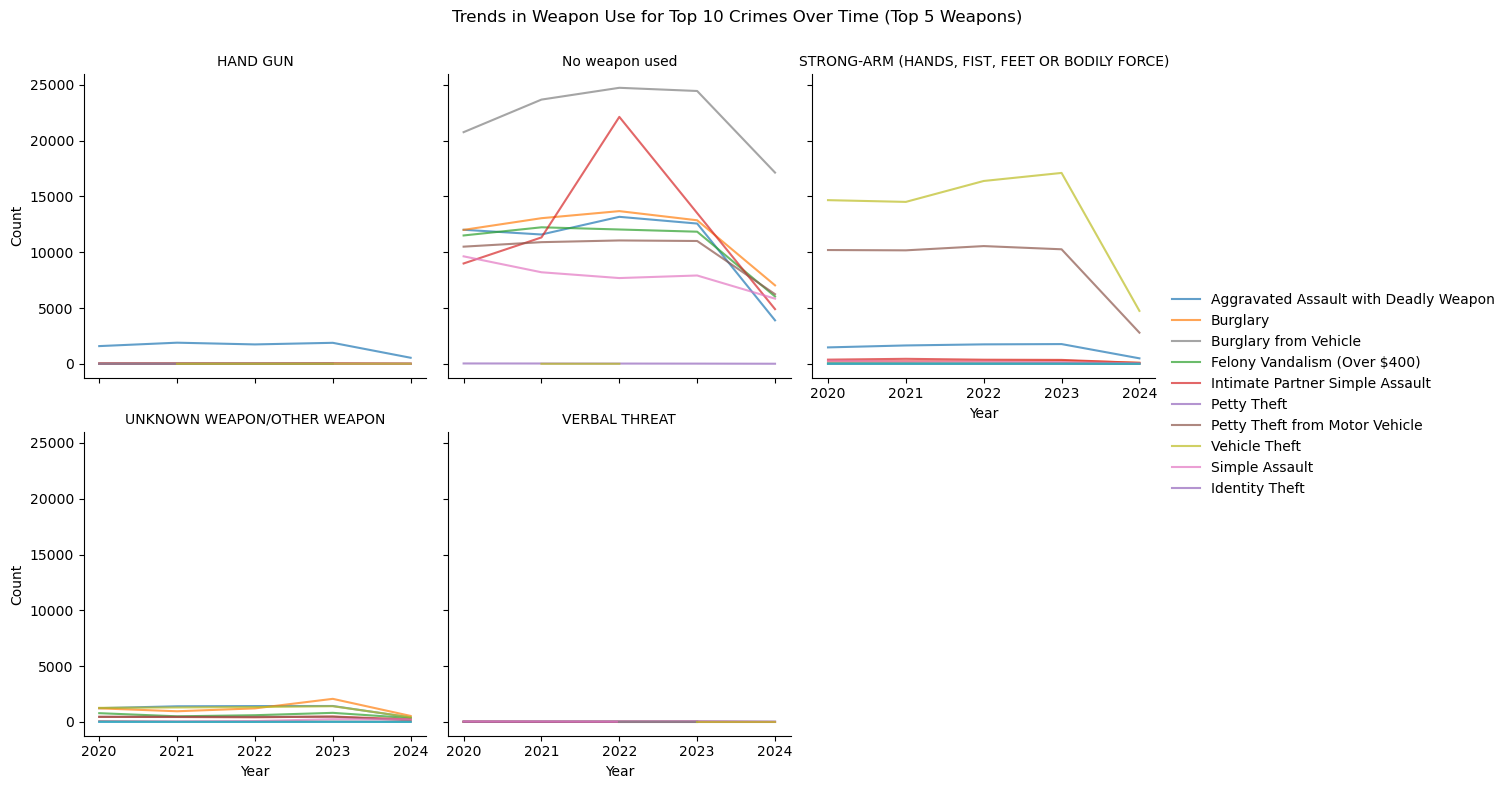

In [39]:
# Extract year and month for time-based analysis
df['year'] = df['date_occurred'].dt.year
df['month'] = df['date_occurred'].dt.month

# Group by weapon and crime type
weapon_trends = df.groupby(['year', 'weapon_description', 'crime_description']).size().reset_index(name='count')

# Filter for top 5 weapons
top_weapons = df['weapon_description'].value_counts().head(5).index
filtered_data = weapon_trends[weapon_trends['weapon_description'].isin(top_weapons)]

# Filter for top 10 crimes based on total occurrences
top_crimes = df['crime_description'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['crime_description'].isin(top_crimes)]

# Create FacetGrid for each weapon
g = sns.FacetGrid(filtered_data, col='weapon_description', col_wrap=3, height=4, sharey=True)
g.map(sns.lineplot, 'year', 'count', 'crime_description', alpha=0.7)
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trends in Weapon Use for Top 10 Crimes Over Time (Top 5 Weapons)")
plt.show()